## Observations and Insights 

In [339]:
%matplotlib notebook

In [362]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pyma_df_raw = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
pyma_df_raw.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [363]:
# Checking the number of mice.
mice = len(pyma_df_raw['Mouse ID'].unique())
mice

249

In [364]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = pyma_df_raw.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)
pyma_df_raw['Duplicates'] = duplicates
pyma_df_raw

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [365]:
# Optional: Get all the data for the duplicate mouse ID. 
pyma_df_duplicates = pyma_df_raw[pyma_df_raw['Duplicates'] == True]
duplicate_ID = pyma_df_duplicates['Mouse ID'].unique()
pyma_df_dup_ID = pyma_df_raw[pyma_df_raw['Mouse ID'] == 'g989']
pyma_df_dup_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [366]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pyma_df_index = pyma_df_raw.set_index('Mouse ID')
pyma_df_clean = pyma_df_index.drop(index = duplicate_ID)
pyma_df = pyma_df_clean.reset_index()
pyma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,False
1876,z969,Naftisol,Male,9,30,30,65.841013,3,False
1877,z969,Naftisol,Male,9,30,35,69.176246,4,False
1878,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [367]:
# Checking the number of mice in the clean DataFrame.
mice_re = len(pyma_df['Mouse ID'].unique())
mice_re

248

## Summary Statistics

In [368]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
pyma_gb = pyma_df.groupby('Drug Regimen')
tumor_mean = pyma_gb['Tumor Volume (mm3)'].mean()
tumor_median = pyma_gb['Tumor Volume (mm3)'].median()
tumor_std = pyma_gb['Tumor Volume (mm3)'].std()
tumor_var = pyma_gb['Tumor Volume (mm3)'].var()
tumor_sem = pyma_gb['Tumor Volume (mm3)'].sem()
pyma_sum_df = pd.merge(tumor_mean, tumor_median, on='Drug Regimen')
pyma_sum_df = pyma_sum_df.rename(columns={'Tumor Volume (mm3)_x':'Mean', 'Tumor Volume (mm3)_y':'Median'})
pyma_sum_df = pd.merge(pyma_sum_df, tumor_var, on='Drug Regimen')
pyma_sum_df = pyma_sum_df.rename(columns={'Tumor Volume (mm3)':'Variance'})
pyma_sum_df = pd.merge(pyma_sum_df, tumor_std, on='Drug Regimen')
pyma_sum_df = pyma_sum_df.rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})
pyma_sum_df = pd.merge(pyma_sum_df, tumor_sem, on='Drug Regimen')
pyma_sum_df = pyma_sum_df.rename(columns={'Tumor Volume (mm3)':'SEM'})
pyma_sum_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [372]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
pyma_agg_df = pyma_gb.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
pyma_agg_df = pyma_agg_df.rename(columns={'mean':'Mean',
                                          'median':'Median',
                                          'var':'Variance',
                                          'std':'Standard Deviation',
                                          'sem':'SEM'})
pyma_agg_df

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.320930  50.446266  43.852013           6.622085   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


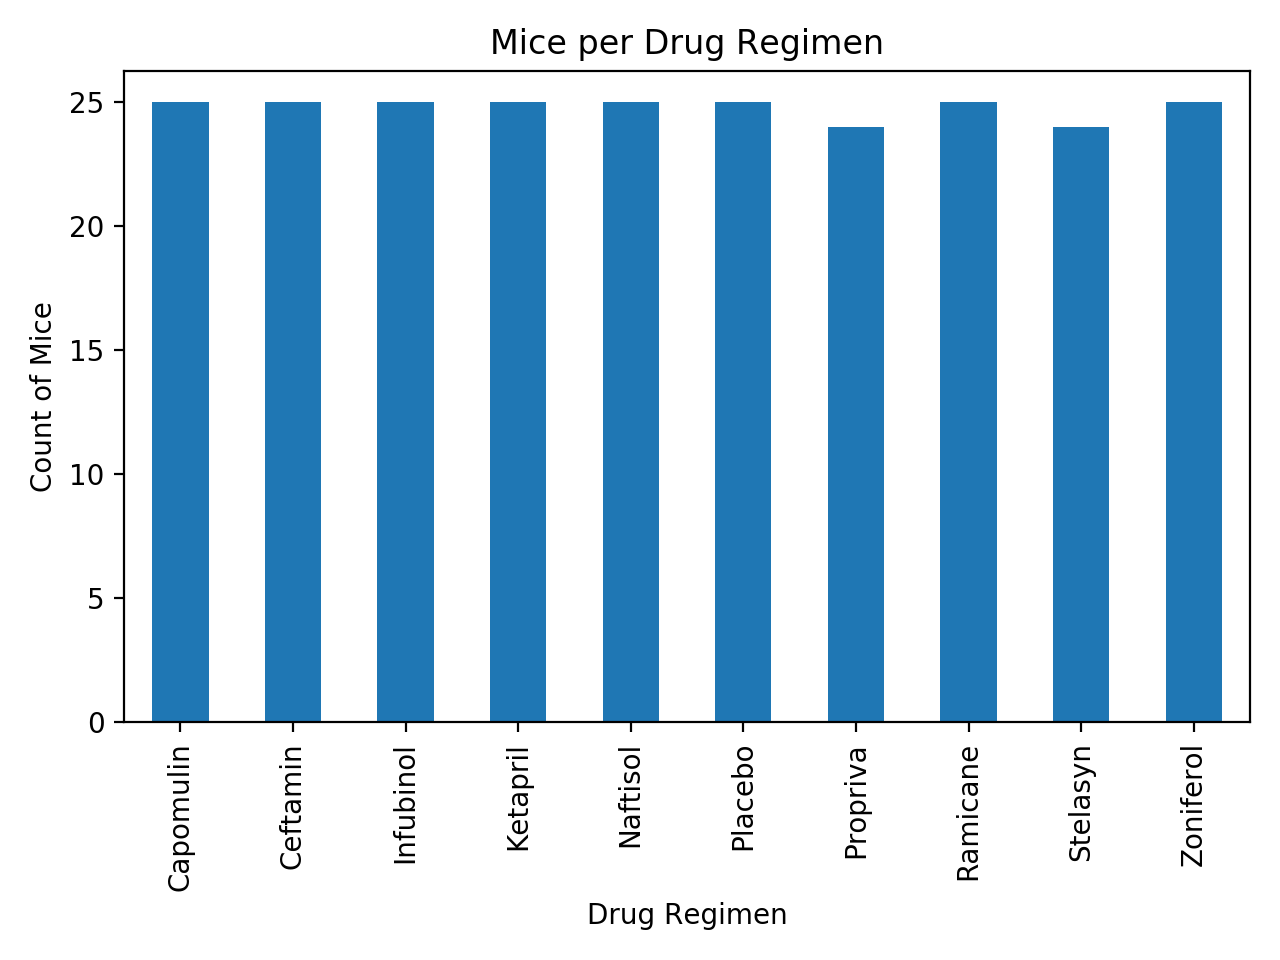

In [376]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
pyma_bar_count = pyma_gb['Mouse ID'].nunique()
pyma_bar_count.plot(kind='bar', title='Mice per Drug Regimen')
#plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


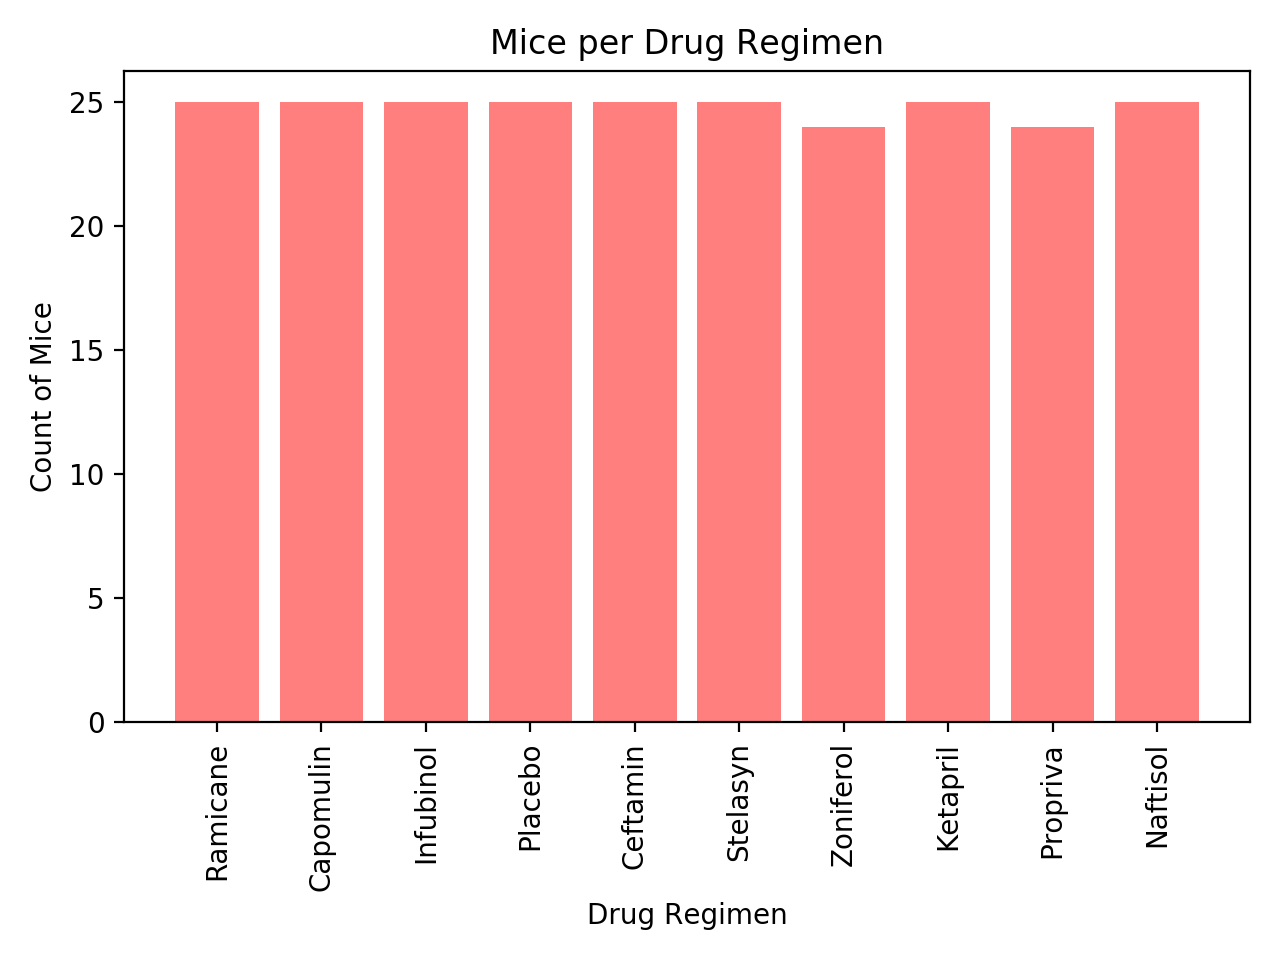

In [378]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugs = pyma_df['Drug Regimen'].unique()
x_axis = np.arange(len(drugs))
x_axis
y_axis = pyma_gb['Mouse ID'].nunique()
y_axis
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(x_axis, drugs, rotation="vertical")
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


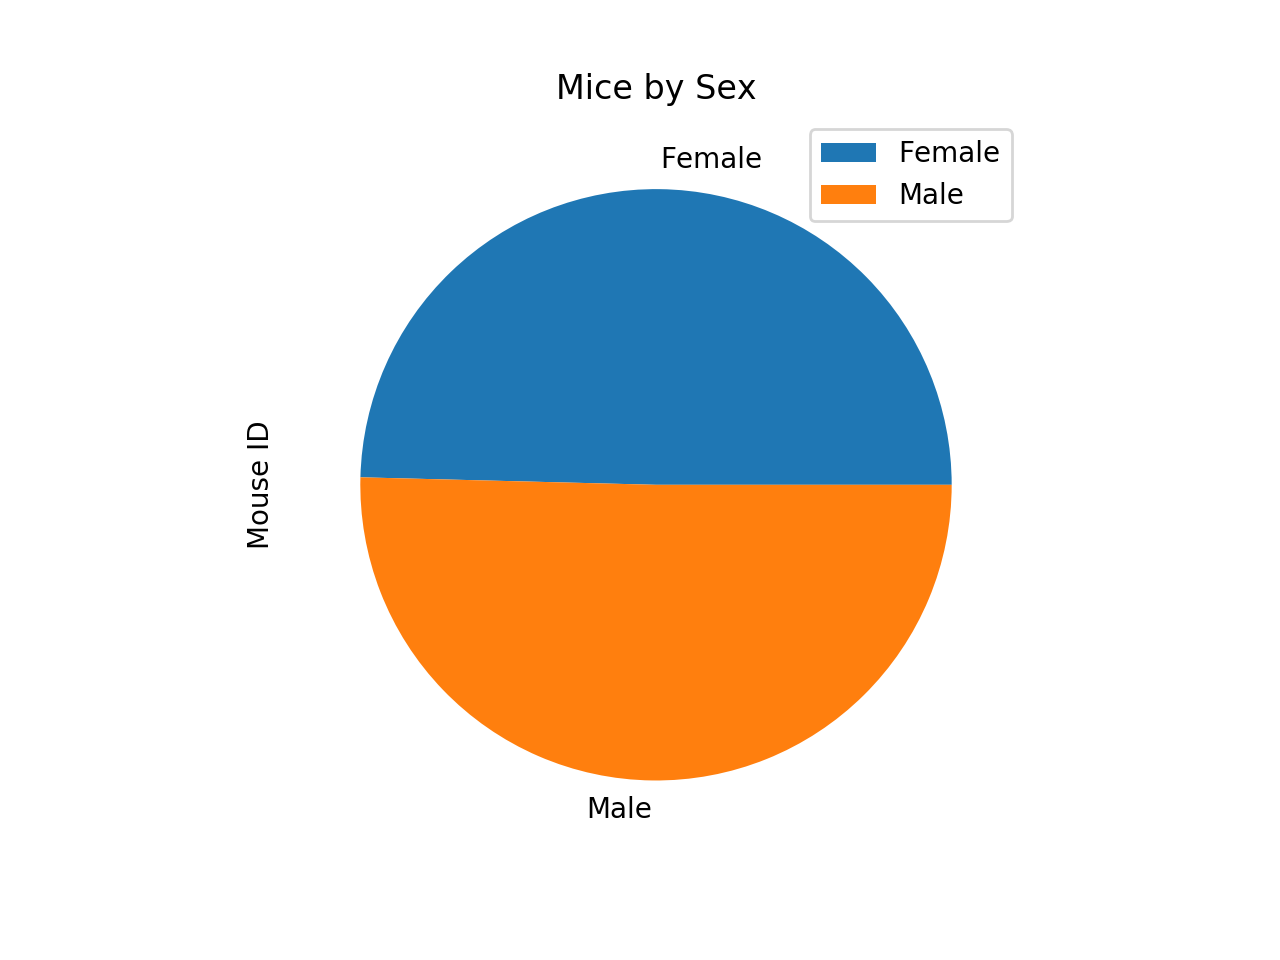

Text(0.5, 1.0, 'Mice by Sex')

In [380]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
values_df = pyma_df.groupby('Sex').nunique(['Mouse ID'])
labels = pyma_df['Sex'].unique()
values_df = pyma_df.groupby('Sex').nunique(['Mouse ID'])
values = values_df['Mouse ID']
colors = ["lightskyblue", "pink"]
values_df.plot(kind='pie', y = 'Mouse ID')
plt.title("Mice by Sex")

<IPython.core.display.Javascript object>


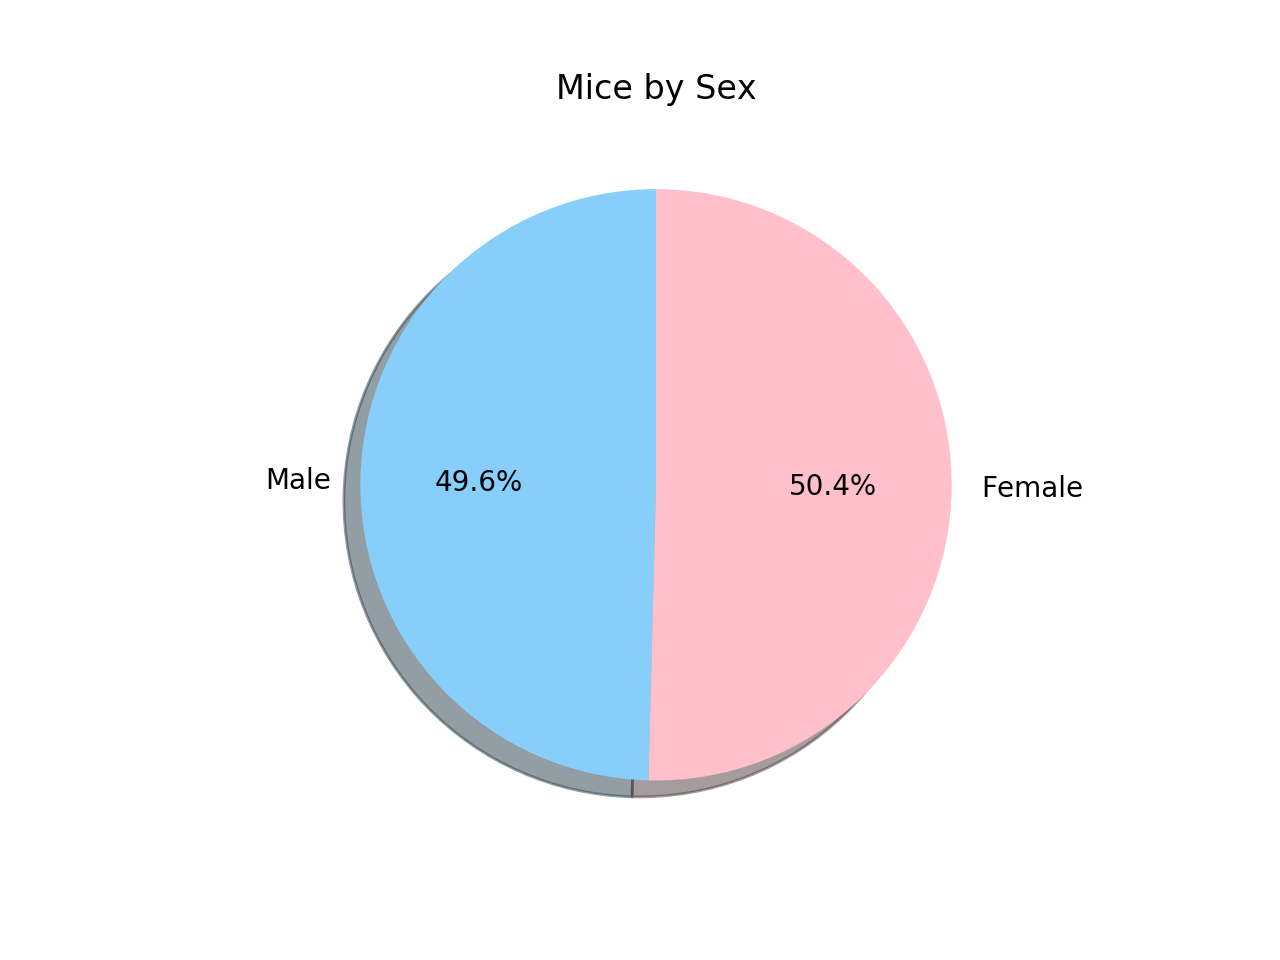

Text(0.5, 1.0, 'Mice by Sex')

In [355]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = pyma_df['Sex'].unique()
values_df = pyma_df.groupby('Sex').nunique(['Mouse ID'])
values = values_df['Mouse ID']
colors = ["lightskyblue", "pink"]
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Mice by Sex")

## Quartiles, Outliers and Boxplots

In [432]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
id_gb = pyma_df.groupby('Mouse ID').max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
pyma_merge_df = pd.merge(id_gb, pyma_df, on='Mouse ID')
pyma_time_df = pyma_merge_df[pyma_merge_df['Timepoint_x'] == pyma_merge_df['Timepoint_y']]
pyma_rename_df = pyma_time_df[['Mouse ID', 'Drug Regimen_x', 'Tumor Volume (mm3)_x', 'Timepoint_x']]
pyma_maxtime_df = pyma_rename_df.rename(columns={'Drug Regimen_x':'Drug Regimen',
                                                 'Tumor Volume (mm3)_x':'Tumor Volume (mm3)',
                                                 'Timepoint_x':'Timepoint'})
pyma_maxtime_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
9,a203,Infubinol,67.973419,45
19,a251,Infubinol,65.525743,45
29,a262,Placebo,70.717621,45
39,a275,Ceftamin,62.999356,45
46,a366,Stelasyn,63.440686,30
...,...,...,...,...
1839,z435,Propriva,48.710661,10
1849,z578,Ramicane,45.000000,45
1859,z581,Infubinol,62.754451,45
1869,z795,Naftisol,65.741070,45


In [504]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumors = []
lowerqs = []
upperqs = []
iqrs = []
median = []
lower_bounds = []
upper_bounds = []
outlier_tumors_df = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
pyma_treatment_df = pyma_maxtime_df.set_index('Drug Regimen')
for drug in treatments:
    drug_df = pyma_treatment_df.loc[drug,'Tumor Volume (mm3)']
    drug_quartiles = drug_df.quantile([.25,.5,.75])
    lowerq = drug_quartiles[0.25]
    lowerqs.append(lowerq)
    upperq = drug_quartiles[0.75]
    upperqs.append(upperq)
    iqr = upperq-lowerq
    iqrs.append(iqr)
    median.append(drug_quartiles[0.5])
    lower_bound = lowerq - (1.5*iqr)
    lower_bounds.append(lower_bound)
    upper_bound = upperq + (1.5*iqr)
    upper_bounds.append(upper_bound)
    print(f"The lower quartile of the final Tumor Volume for {drug} is: {round(lowerq,2)} mm3")
    print(f"The upper quartile of the final Tumor Volume for {drug} is: {round(upperq,2)} mm3")
    print(f"The interquartile range of the final Tumor Volume for {drug} is: {round(iqr,2)} mm3")
    print(f"The the median of the final Tumor Volume for {drug} is: {round(drug_quartiles[0.5],2)} mm3")
    print(" ")
    drug_tumors_df = drug_df
    #drug_tumors_df = pyma_maxtime_df.loc[pyma_maxtime_df['Drug Regimen'] == drug,:]
    print(drug_tumors_df)
    outlier_tumors_df = drug_tumors_df.loc[(drug_tumors_df < lower_bound) | (drug_tumors_df > upper_bound)]
    #outlier_tumors_df
    #    print(outlier_tumors_df)
    # add subset 
quar_out_df = pd.DataFrame({"Drug Regimen":treatments, "Lower Quartiles":lowerqs,
                            "Upper Quartiles":upperqs, "Inter Quartiles":iqrs,
                            "Median":median, "Lower Bounds":lower_bounds,
                            "Upper Bounds":upper_bounds})    
#quar_out_df
    # Determine outliers using upper and lower bounds

#For drug in treatments, if drug regimen = drug and below lower or above upper, append
print(lower_bounds)
print(upper_bounds)
#outlier_tumors_df

The lower quartile of the final Tumor Volume for Capomulin is: 45.0 mm3
The upper quartile of the final Tumor Volume for Capomulin is: 46.75 mm3
The interquartile range of the final Tumor Volume for Capomulin is: 1.75 mm3
The the median of the final Tumor Volume for Capomulin is: 45.89 mm3
 
Drug Regimen
Capomulin    45.651331
Capomulin    45.000000
Capomulin    45.000000
Capomulin    46.304003
Capomulin    46.809225
Capomulin    47.685963
Capomulin    45.595685
Capomulin    48.158209
Capomulin    46.408361
Capomulin    48.070452
Capomulin    46.154737
Capomulin    45.000000
Capomulin    46.414518
Capomulin    46.539206
Capomulin    45.781746
Capomulin    47.373423
Capomulin    45.000000
Capomulin    45.000000
Capomulin    46.749006
Capomulin    47.212200
Capomulin    45.704434
Capomulin    45.000000
Capomulin    45.893720
Capomulin    45.473753
Capomulin    45.000000
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of the final Tumor Volume for Ramicane is: 45.0 mm3
The upp

In [491]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
